In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, sys
from pathlib import Path
project_root = Path().absolute().parent
sys.path.append(str(project_root))

import src.utils as utils
# from src.utils import analyze_temperature_data, run_parallel_analysis

from src.config import DATA_DIR


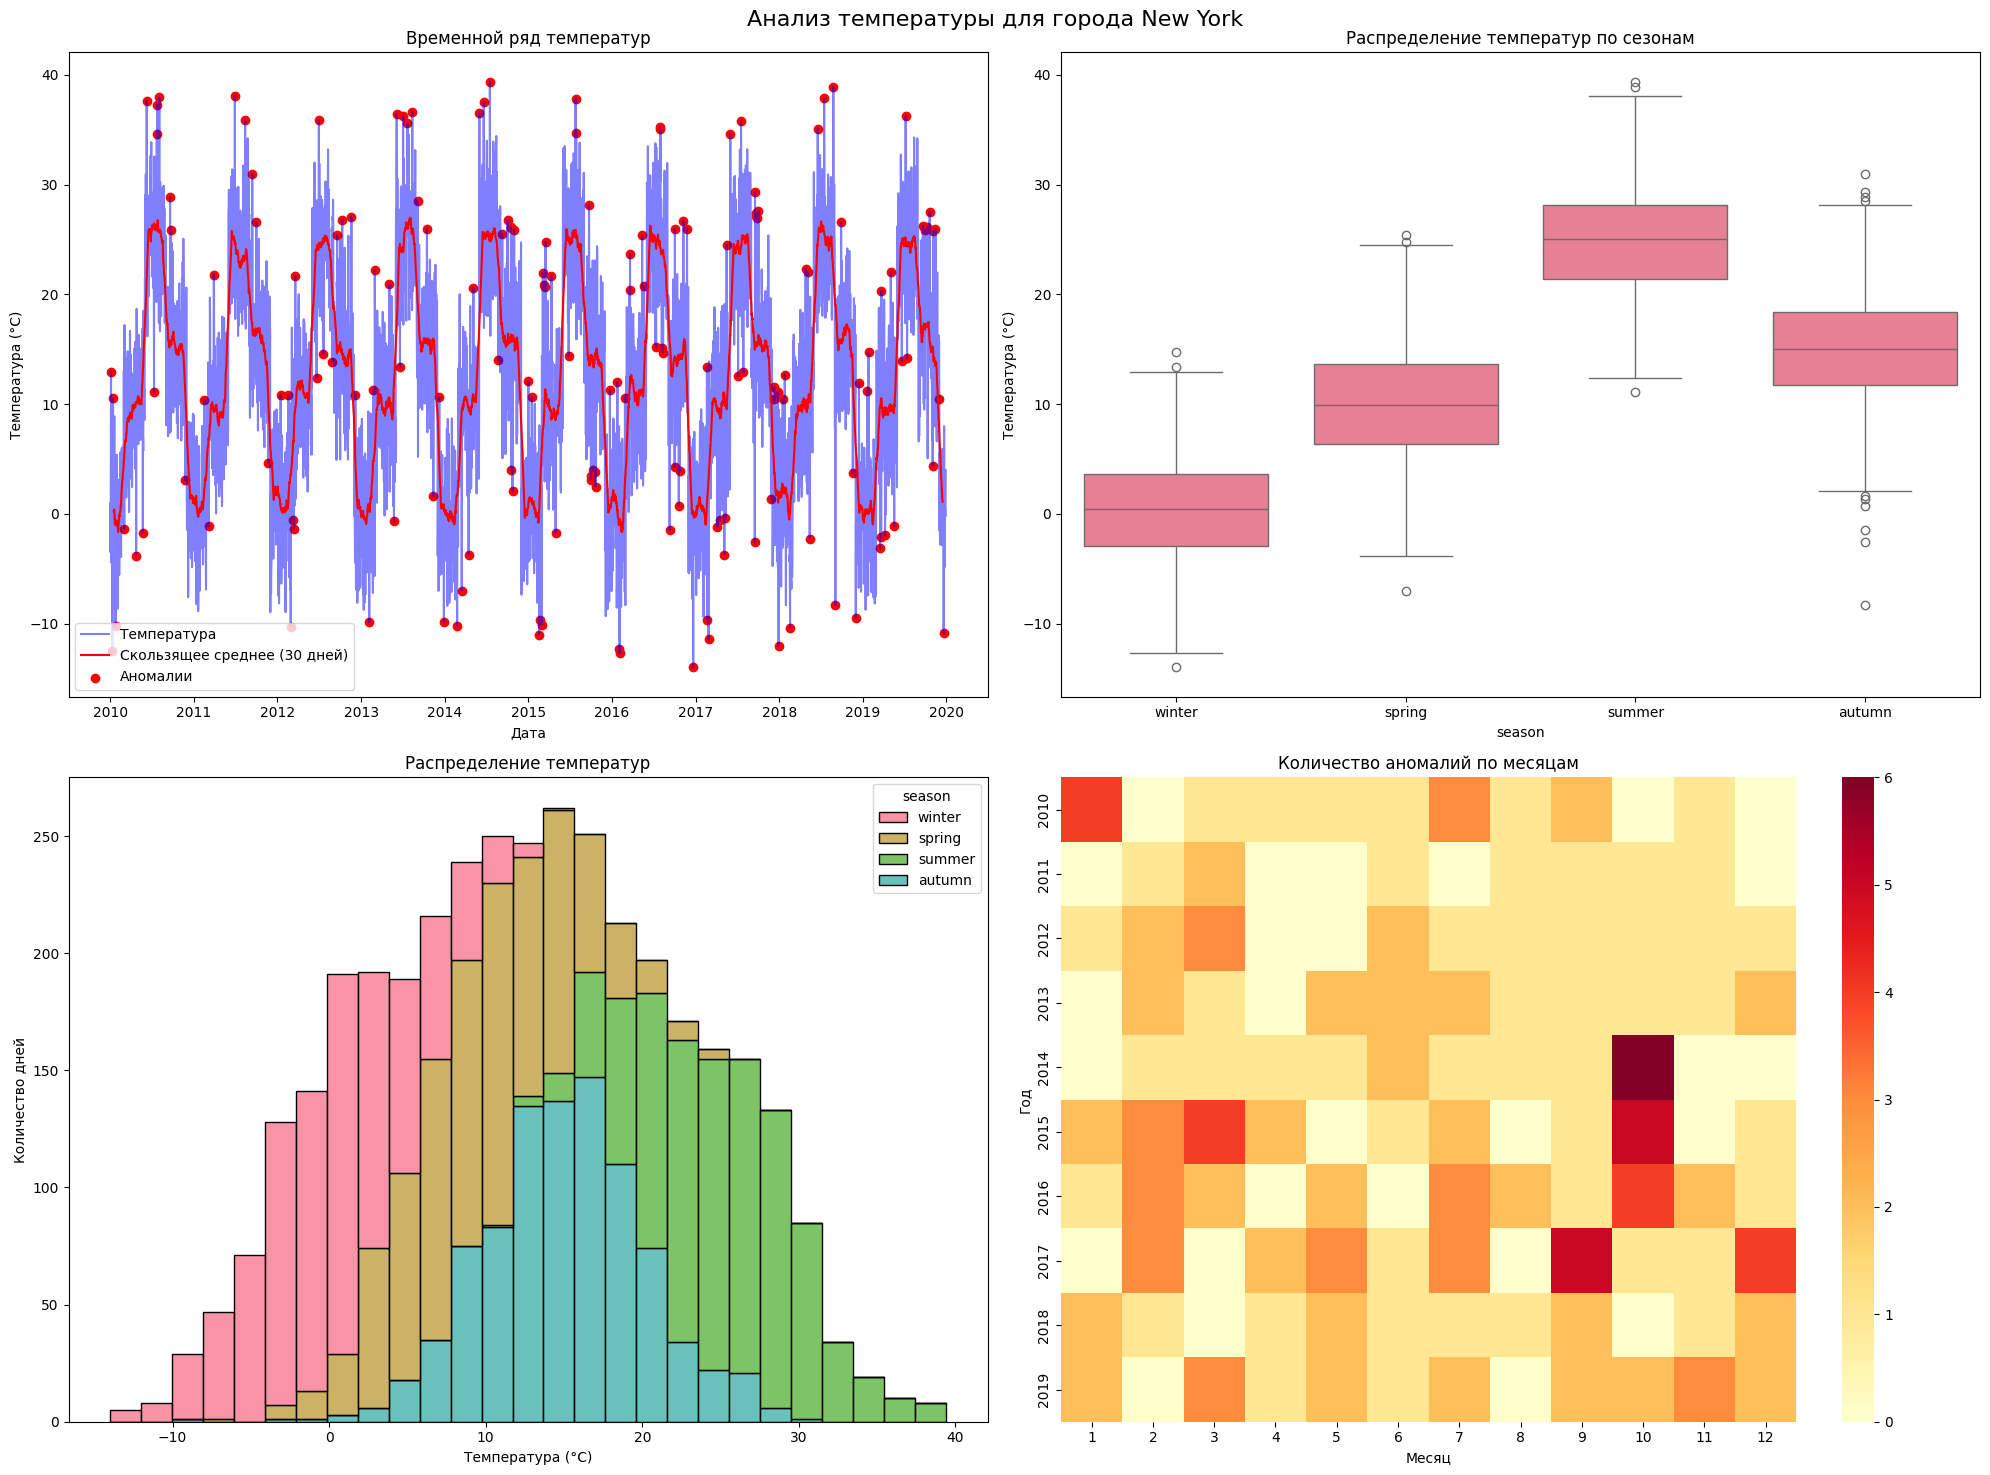


Статистика по сезонам для города New York:
       temperature      
              mean   std
season                  
autumn       15.05  5.17
spring        9.90  5.11
summer       24.89  4.85
winter        0.40  4.89

Общее количество аномалий: 166

Процент аномальных дней по сезонам:
       sum  count percentage
season                      
autumn  49    910   5.384615
spring  38    920   4.130435
summer  38    920   4.130435
winter  41    900   4.555556


In [64]:
# Настройки для графиков
plt.style.use('seaborn-v0_8-dark-palette')
sns.set_palette("husl")

# Загружаем данные
df = pd.read_csv(DATA_DIR / 'temperature_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])


# Анализируем данные для каждого города
cities = df['city'].unique()
results = {city: utils.analyze_temperature_data(df, city) for city in cities}

# Выбираем город для детального анализа
city = cities[0]  # например, первый город
city_results = results[city]
city_data = city_results['data']
seasonal_stats = city_results['seasonal_stats']

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle(f'Анализ температуры для города {city}', fontsize=16)

# 1. График временного ряда с аномалиями
ax = axes[0, 0]
ax.plot(city_data['timestamp'], city_data['temperature'], 'b-', alpha=0.5, label='Температура')
ax.plot(city_data['timestamp'], city_data['rolling_mean'], 'r-', label='Скользящее среднее (30 дней)')
anomalies = city_data[city_data['is_anomaly']]
ax.scatter(anomalies['timestamp'], anomalies['temperature'], color='red', label='Аномалии')
ax.set_title('Временной ряд температур')
ax.set_xlabel('Дата')
ax.set_ylabel('Температура (°C)')
ax.legend()

# 2. Box plot по сезонам
ax = axes[0, 1]
sns.boxplot(data=city_data, x='season', y='temperature', ax=ax)
ax.set_title('Распределение температур по сезонам')
ax.set_ylabel('Температура (°C)')

# 3. Гистограмма температур
ax = axes[1, 0]
sns.histplot(data=city_data, x='temperature', hue='season', multiple="stack", ax=ax)
ax.set_title('Распределение температур')
ax.set_xlabel('Температура (°C)')
ax.set_ylabel('Количество дней')

# 4. Тепловая карта аномалий по месяцам и годам
ax = axes[1, 1]
city_data['year'] = city_data['timestamp'].dt.year
city_data['month'] = city_data['timestamp'].dt.month
anomalies_pivot = city_data.pivot_table(
    values='is_anomaly',
    index='year',
    columns='month',
    aggfunc='sum'
).astype(int)
sns.heatmap(anomalies_pivot, ax=ax, cmap='YlOrRd')
ax.set_title('Количество аномалий по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Год')

plt.tight_layout()
plt.show()

# Выводим статистику
print(f"\nСтатистика по сезонам для города {city}:")
print(seasonal_stats)

print(f"\nОбщее количество аномалий: {city_data['is_anomaly'].sum()}")
print("\nПроцент аномальных дней по сезонам:")
seasonal_anomalies = city_data.groupby('season')['is_anomaly'].agg(['sum', 'count'])
seasonal_anomalies['percentage'] = (seasonal_anomalies['sum'] / seasonal_anomalies['count'] * 100).round(2)
print(seasonal_anomalies)

In [63]:
# последоватльный анализ
start_time = time.time()
results = {city: utils.analyze_temperature_data(df, city) for city in cities}
end_time = time.time()
print(f"Время выполнения последовательного анализа: {end_time - start_time:.2f} секунд")

# параллельный анализ

Время выполнения последовательного анализа: 0.12 секунд


Вызов параллельного анализа из ноутбука не работает, так как по какой-то причине не импортируется utils.run_parallel_analysis.

Точно такой же код в main.py работает.

In [62]:
# Сравнение времени выполнения
start_time = time.time()
results, execution_time = utils.run_parallel_analysis(df)
end_time = time.time()
print(f"Время выполнения параллельного анализа: {end_time - start_time:.2f} секунд (выполнено в ноутбуке) / {execution_time=}/")


AttributeError: module 'src.utils' has no attribute 'run_parallel_analysis'